@inproceedings{rdl,
  title={Position: Relational Deep Learning - Graph Representation Learning on Relational Databases},
  author={Fey, Matthias and Hu, Weihua and Huang, Kexin and Lenssen, Jan Eric and Ranjan, Rishabh and Robinson, Joshua and Ying, Rex and You, Jiaxuan and Leskovec, Jure},
  booktitle={Forty-first International Conference on Machine Learning}
}

@misc{relbench,
      title={RelBench: A Benchmark for Deep Learning on Relational Databases},
      author={Joshua Robinson and Rishabh Ranjan and Weihua Hu and Kexin Huang and Jiaqi Han and Alejandro Dobles and Matthias Fey and Jan E. Lenssen and Yiwen Yuan and Zecheng Zhang and Xinwei He and Jure Leskovec},
      year={2024},
      eprint={2407.20060},
      archivePrefix={arXiv},
      primaryClass={cs.LG},
      url={https://arxiv.org/abs/2407.20060},
}

# Benchmark RelBench

En teoría voy a trabajar con una librería que utiliza IA, para crear tablas desde SQL. 

Está es capaz de relacionar y crear una unica tabla en base da todo el database, entendiendo la relación de las forengkeys y relaciones.

Esto se considera APRENDIZAJE PRFUNDO RELACIONAL. Este nuevo enfoque representa de extremos a extremo sobre datos distribuidos en varias tablas relacionadas.

Ofrece una implementación de código abierto de un enfoque basado en redes neuronales gráficas para el aprendizaje prgundo relacional. 

Esta implementación utiliza PyTorch Geometric para cargar los datos como un gráfico y entrenar modelos GNN, y PyTorch Frame para modelar datos tabulares. 

Por último, hay una tabla de clasificación abierta para realizar un seguimiento del progreso.

# Diseño de RelBench

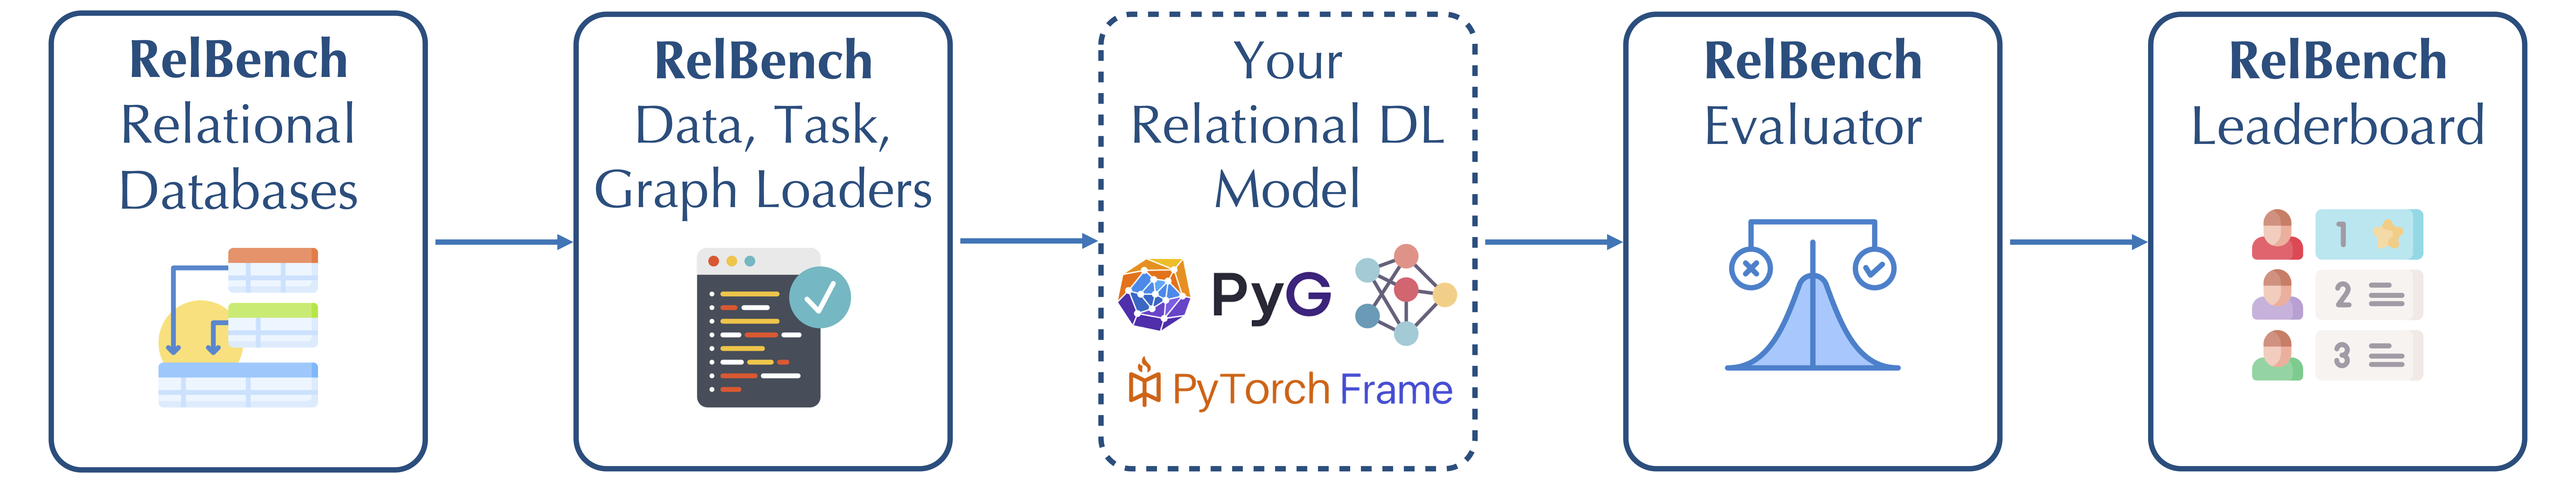

## RelBench tiene los siguientes componentes principales:

1. 7 bases de datos con un total de 30 tareas; ambas descargables automáticamente para facilitar su uso
2. Fácil carga de datos y construcción de gráficos a partir de enlaces pkey-fkey
3. Su propio modelo, que puede utilizar cualquier pila de aprendizaje profundo, ya que RelBench es independiente del marco de trabajo. Ofrecemos una primera implementación del modelo utilizando PyTorch Geometric y PyTorch Frame.
4. Evaluadores estandarizados: todo lo que necesita hacer es generar una lista de predicciones para muestras de prueba y RelBench calcula métricas para garantizar una evaluación estandarizada.
5. Una tabla de clasificación en la que puedes cargar tus resultados para seguir el progreso de SOTA.

# Importación y Versión de RelBench

Asumiendo que tengo instalado relbench, lo importo y veo la versión.

In [1]:
import relbench

relbench.__version__

'1.1.0'

# Importación de paquetes

In [2]:
from relbench.base import Table, Database, Dataset, EntityTask
from relbench.datasets import get_dataset
from relbench.tasks import get_task

# Obtener un conjunto de datos, por ejemplo rel-amazon:



<b style="color:skyblue">dataset</b> consiste en un <b style="color:lime">Database</b> objeto y tiempos de división temporal <b style="color:#7DDDD5">dataset.val_timestampy</b> <b style="color:#DFFFD0">dataset.test_timestamp</b>.

In [3]:
dataset: Dataset = get_dataset("rel-amazon", download=True)

100%|#####################################| 6.40G/6.40G [00:00<00:00, 6.41TB/s]
Unzipping contents of 'C:\Users\User\AppData\Local\relbench\relbench\Cache\rel-amazon\db.zip' to 'C:\Users\User\AppData\Local\relbench\relbench\Cache\rel-amazon\.'


# Para obtener la base de datos:



In [4]:
db: Database = dataset.get_db()

Loading Database object from C:\Users\User\AppData\Local\relbench\relbench\Cache/rel-amazon/db...
Done in 99.15 seconds.


In [10]:
db.table_dict

{'customer': Table(df=
          customer_id         customer_name
 0                  0           TW Ervin II
 1                  1       Amazon Customer
 2                  2          Tekla Borner
 3                  3  Deborah K Woroniecki
 4                  4                     E
 ...              ...                   ...
 1850188      1850188       Amazon Customer
 1850189      1850189                AmizoP
 1850190      1850190            JuicyBeans
 1850191      1850191         Halley Cortez
 1850192      1850192               RNqueen
 
 [1850193 rows x 2 columns],
   fkey_col_to_pkey_table={},
   pkey_col=customer_id,
   time_col=None),
 'product': Table(df=
         product_id                                           category  \
 0                0      [Books, Literature & Fiction, Dramas & Plays]   
 1                1    [Books, Children's Books, Literature & Fiction]   
 2                2              [Books, Mystery, Thriller & Suspense]   
 3                3       

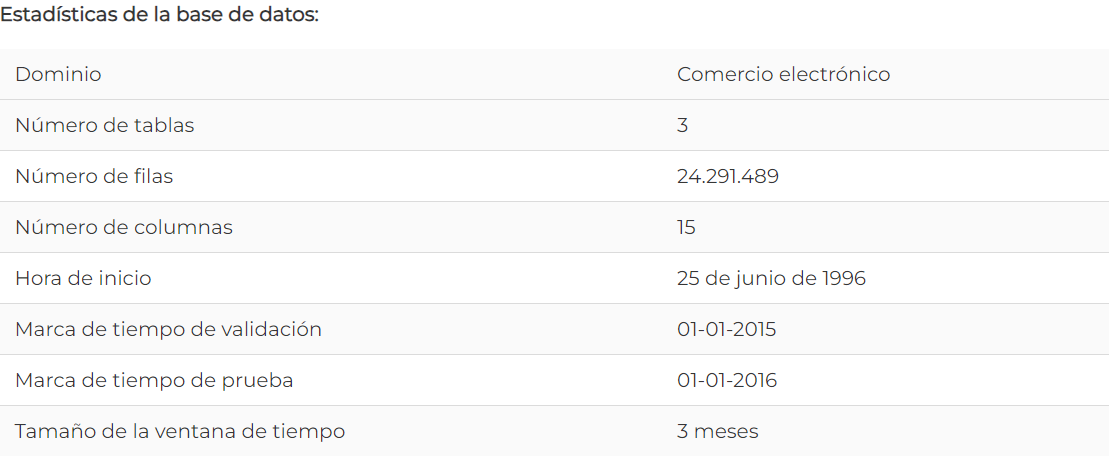

Este diccionario utiliza claves (`customer`, `product`, `review`) que corresponden a tablas en la base de datos. 

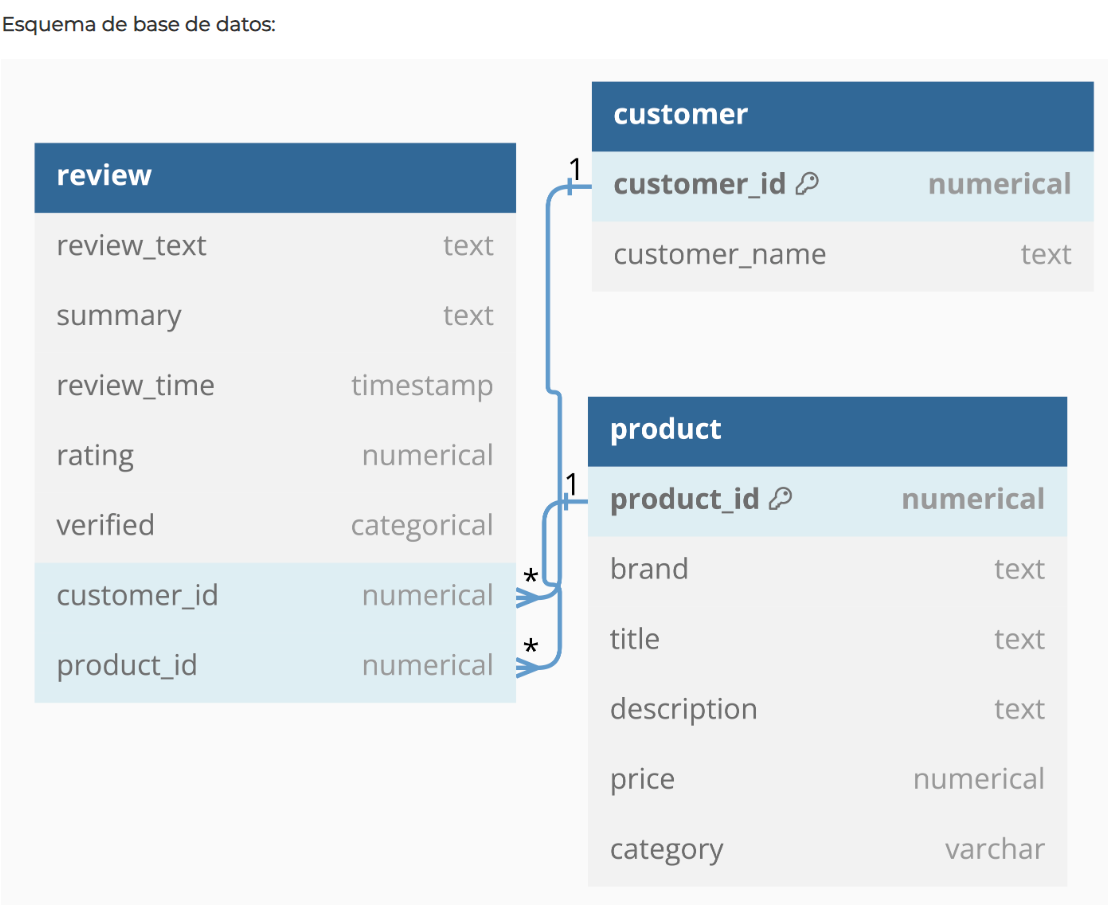

Cada clave está asociada a un objeto Table, que almacena información específica sobre la tabla correspondiente, como el dataframe `(df)`, claves foráneas `(fkey_col_to_pkey_table)`, columna primaria `(pkey_col)`, y columna de tiempo `(time_col)`.




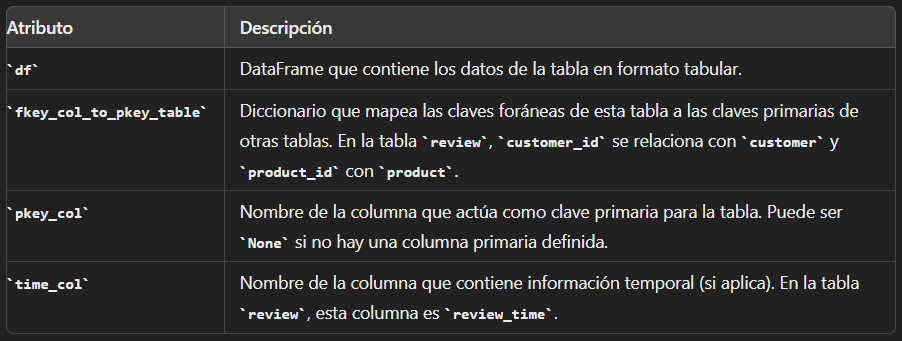

### Clave Primaria (pkey_col):

Define cuál es la columna que identifica de manera única cada fila en la tabla. Si es None, significa que no hay una clave primaria explícita definida.

### Columna de Tiempo (time_col):

Si la tabla incluye datos temporales, esta columna especifica qué columna contiene esa información. En la tabla review, review_time es la columna de tiempo.
<hr>

### <b style="color:#D291D2">Prevención de fugas temporales</b>

De forma predeterminada, las filas con una marca de tiempo > <b style="color:#DFFFD0">dataset.test_timestamp</b> se excluyen para evitar fugas temporales accidentales. 

La base de datos completa se puede obtener con: ```python full_db: Database = dataset.get_db(upto_test_timestamp=False) ```

<hr>

# Se pueden definir varias tareas en un conjunto de datos. 

Por ejemplo, para obtener la user-churn tarea para rel-amazon:



In [11]:
task: EntityTask = get_task("rel-amazon", "user-churn", download=True)

100%|#############################################| 14.9M/14.9M [00:00<?, ?B/s]
Unzipping contents of 'C:\Users\User\AppData\Local\relbench\relbench\Cache\rel-amazon\tasks\user-churn.zip' to 'C:\Users\User\AppData\Local\relbench\relbench\Cache\rel-amazon\tasks\.'


<hr>

# Una tarea proporciona tablas de entrenamiento/validación/prueba:



In [12]:
train_table: Table = task.get_table("train")
val_table: Table = task.get_table("val")
test_table: Table = task.get_table("test")

Puede crear su modelo sobre la base de datos y las tablas de tareas. Después del entrenamiento y la validación, puede hacer predicciones a partir de su modelo en la tabla de prueba. Supongamos que su predicción test_predes una matriz NumPy que sigue el orden de task.test_table, puede llamar a lo siguiente para obtener las métricas de evaluación:

In [15]:
# task.evaluate(test_pred)

Además, puedes evaluar las predicciones de validación (o entrenamiento) de la siguiente manera:



In [16]:
# task.evaluate(val_pred, val_table)

<hr>


<hr>

# To-do link: https://relbench.stanford.edu/datasets/rel-amazon/


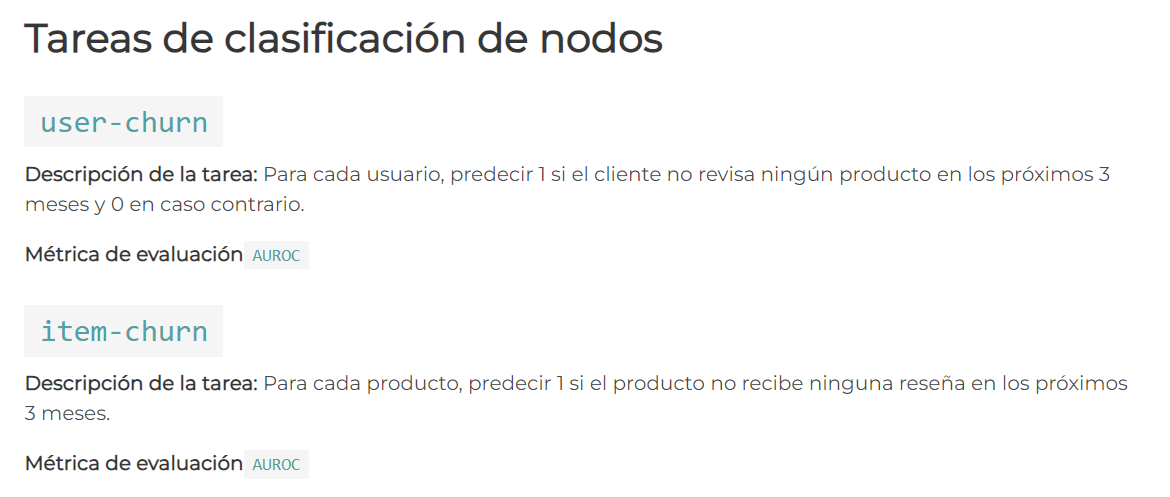

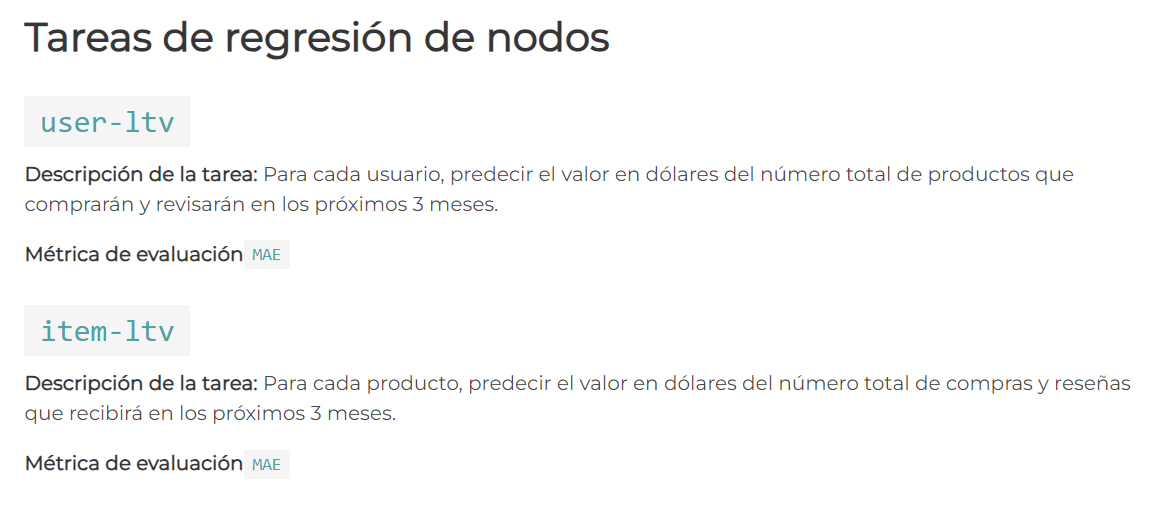

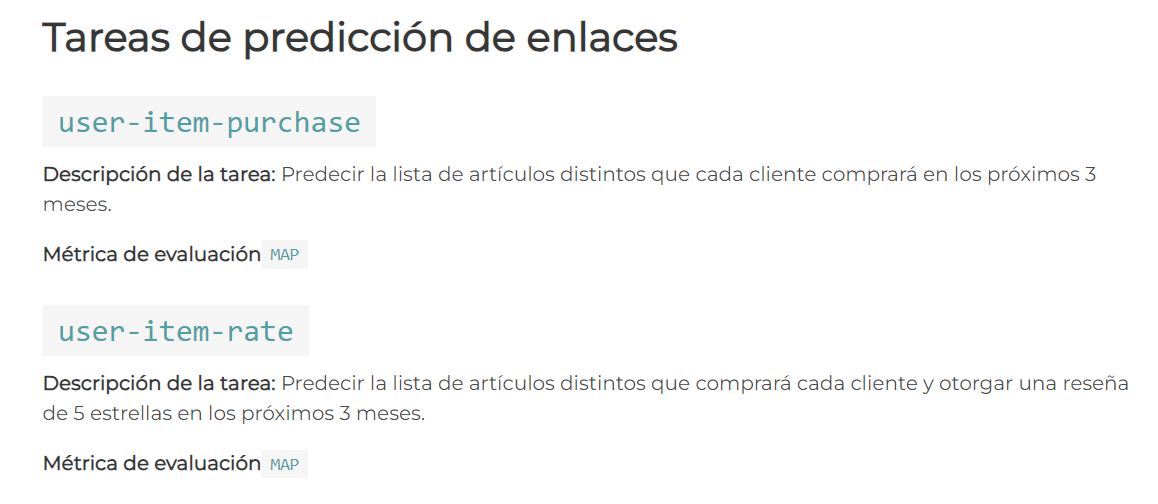